<a href="https://colab.research.google.com/github/RobertoRamosCastro/LTAW-Practicas/blob/main/CNN_Keras_Con_Validacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
from keras.utils import split_dataset
import numpy as np

In [ ]:
data, metadata = tfds.load('mnist', as_supervised=True, with_info=True)

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [ ]:
train, test = data['train'], data['test']

In [ ]:
train, test

(<PrefetchDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>,
 <PrefetchDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>)

In [ ]:
# Separar conjunto de datos de entrenamiento
train_ds, val_ds = split_dataset(train, left_size=0.8)

In [ ]:
num_examples_train = int(train_ds.cardinality())
num_examples_val = int(val_ds.cardinality())
num_examples_train, num_examples_val

(48000, 12000)

In [ ]:
train_ds, val_ds

(<PrefetchDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>,
 <PrefetchDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>)

In [ ]:
metadata

tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_path='/root/tensorflow_datasets/mnist/3.0.1.incompleteOZJNX0',
    file_format=tfrecord,
    download_size=11.06 MiB,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }"""

In [ ]:
class_names = metadata.features['label'].names
class_names

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

<function matplotlib.pyplot.show(close=None, block=None)>

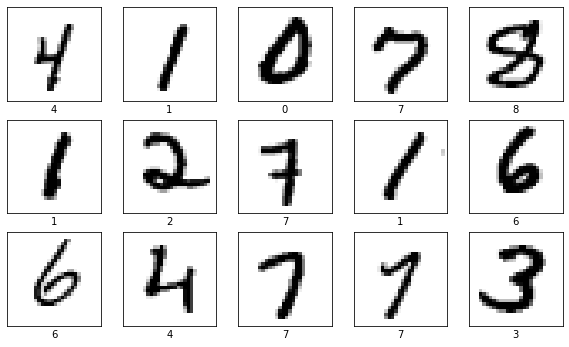

In [ ]:
# Visualizar los datos

import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for i, (imagen, etiqueta) in enumerate(train_ds.take(15)):
  imagen = imagen.numpy()
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(imagen, cmap=plt.cm.binary)
  plt.xlabel(class_names[etiqueta])
plt.show

In [ ]:
# Normalizar la data

def normalize(imagenes, etiquetas):
  imagenes = tf.cast(imagenes, dtype=tf.float32)
  imagenes /= 255
  return imagenes, etiquetas


In [ ]:
# Preprocesamiento de los datos

train_ds = train_ds.map(normalize)
val_ds = val_ds.map(normalize)

# Cargarlo en la memoria de cache
train_ds = train_ds.cache()
val_ds = val_ds.cache()

BATCH_SIZE = 32
# Datos de entrenamiento
train_ds = train_ds.shuffle(num_examples_train)
train_ds = train_ds.batch(BATCH_SIZE)
train_ds = train_ds.prefetch(tf.data.experimental.AUTOTUNE)

# Datos de validacion
val_ds = val_ds.batch(BATCH_SIZE)
val_ds = val_ds.prefetch(tf.data.experimental.AUTOTUNE)

In [ ]:
train_ds, val_ds

(<PrefetchDataset element_spec=(TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>,
 <PrefetchDataset element_spec=(TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>)

import matplotlib.pyplot as plt

for imagen, lbl, in train.take(1):
  break
  imagen = imagen.numpy().reshape((28,28)) # Redimensionamos

# Dibujar la imagen
plt.figure()
plt.imshow(imagen)
plt.colorbar()
plt.grid(False)
plt.show()

plt.figure(figsize=(10,10))
for i, (imagen, etiqueta) in enumerate(train.take(1)):
  imagen = imagen.numpy()
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(imagen, cmap=plt.cm.binary)
  plt.xlabel(class_names[etiqueta])
plt.show

In [ ]:
# Comprobar el tramaño de las imagenes del conjunto de entrenamiento
ds = tfds.load('mnist', split='train')
ds = ds.take(1)

for example in ds:
  print(list(example.keys()))
  image = example['image']
  tamano_entrada = image.shape
  label = example['label']
  print(tamano_entrada, label)

['image', 'label']
(28, 28, 1) tf.Tensor(4, shape=(), dtype=int64)


In [ ]:
# Definir la arquitectura de nuestra CNN
from keras.layers.merging.add import add
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Dense, Flatten, Dropout

num_clases = len(class_names)

model = Sequential()

# Hidden layer 1
model.add(Convolution2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))

# Hidden layer 2
model.add(Convolution2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(num_clases, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [ ]:
# Definir modelo

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Entrenar modelo

num_epocas = 20

history = model.fit(train_ds,
          epochs=num_epocas,
          batch_size=BATCH_SIZE,
          validation_data=val_ds,
          verbose=1)

Epoch 1/20
1500/1500 [==============================] - 19s 5ms/step - loss: 0.1972 - accuracy: 0.9379 - val_loss: 0.0573 - val_accuracy: 0.9822
Epoch 2/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0676 - accuracy: 0.9800 - val_loss: 0.0459 - val_accuracy: 0.9855
Epoch 3/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0507 - accuracy: 0.9853 - val_loss: 0.0388 - val_accuracy: 0.9879
Epoch 4/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0400 - accuracy: 0.9874 - val_loss: 0.0348 - val_accuracy: 0.9885
Epoch 5/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0316 - accuracy: 0.9900 - val_loss: 0.0328 - val_accuracy: 0.9898
Epoch 6/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0270 - accuracy: 0.9917 - val_loss: 0.0319 - val_accuracy: 0.9898
Epoch 7/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0219 - accuracy: 0.9929 - val_loss: 0.0276 - val_accuracy

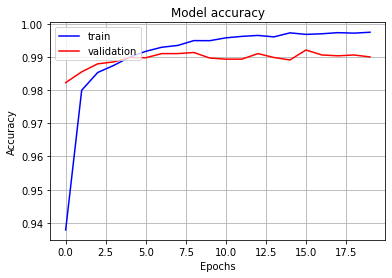

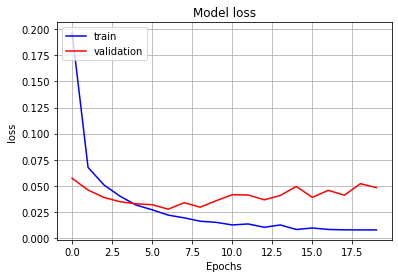

In [ ]:
# Graficar modelo

loss = history.history['loss']
accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

plt.plot(accuracy, 'b-')
plt.plot(val_accuracy, 'r-')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')

plt.legend(['train', 'validation'], loc='upper left')
plt.grid()
plt.show()

plt.plot(loss, 'b-')
plt.plot(val_loss, 'r-')
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epochs')

plt.legend(['train', 'validation'], loc='upper left')
plt.grid()
plt.show()


In [ ]:
max_acc_val = max(val_accuracy)
print('Val_accuracy maxima:',round(max_acc_val, 2))

max_acc_train = max(accuracy)
print('Train_accuracy maxima:',round(max_acc_train,2))

max_loss = max(val_loss)
print('Val_loss maxima:',round(max_loss,2))

Val_accuracy maxima: 0.99
Train_accuracy maxima: 1.0
Val_loss maxima: 0.06


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd '/content/gdrive/MyDrive/AtecneaYTB'

/content/gdrive/MyDrive/AtecneaYTB


In [ ]:
!ls

 CNN_Keras_Con_Validacion.ipynb   modelo
 CNN_Keras.ipynb		 'Prediccion modelos.ipynb'


In [ ]:
# Guardar modelo
import os 

dir = '/content/gdrive/MyDrive/AtecneaYTB/modelo'

if not os.path.exists(dir):
  os.mkdir('modelo')

model.save('/content/gdrive/MyDrive/AtecneaYTB/modelo/modelo_con_validacion.h5')
model.save_weights('/content/gdrive/MyDrive/AtecneaYTB/modelo/pesos_con_validacion.h5')

import tensorflow-gpu si tienes una gpu en tu equipo